## 1. EXPLORACIÓN DE LOS DATOS

Acciones previas:
- Cargar las librerías a usar 
- Definir directorio Google para almacenar el notebook
- Cargar conjunto de datos

In [1]:
#IMPORTAR LIBRERÍAS
import numpy as np #Numpy
import pandas as pd #Pandas 
import matplotlib.pyplot as plt #Matplotlib
from datetime import datetime
import seaborn as sns

In [2]:
# Dar permisos a Colab para acceder a directorios Google Drive
from google.colab import drive
drive.mount('/content/drive')

BASE_FOLDER = '/content/drive/My Drive/TFM/DATASETS/' 

Mounted at /content/drive


In [3]:
#Cargar datasets de datos
df_errors = pd.read_csv(BASE_FOLDER + '4_MicrosoftAzurePredictiveMaintenance/PdM_errors.csv')
df_failures = pd.read_csv(BASE_FOLDER + '4_MicrosoftAzurePredictiveMaintenance/PdM_failures.csv')
df_machines = pd.read_csv(BASE_FOLDER + '4_MicrosoftAzurePredictiveMaintenance/PdM_machines.csv')
df_maint = pd.read_csv(BASE_FOLDER + '4_MicrosoftAzurePredictiveMaintenance/PdM_maint.csv')
df_telemetry = pd.read_csv(BASE_FOLDER + '4_MicrosoftAzurePredictiveMaintenance/PdM_telemetry.csv')

### 1.1 SUBCONJUNTO: CONDICIONES Y USO DE LA MÁQUINA

In [4]:
#Visualizar muestra del subconjunto de datos
display(df_machines)

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2
...,...,...,...
95,96,model2,10
96,97,model2,14
97,98,model2,20
98,99,model1,14


In [5]:
#Contadores de "model" y "age"
count_model = df_machines['model'].value_counts()
count_age = df_machines['age'].value_counts()

##### Nº MÁQUINAS/MODELO 

In [6]:
count_model_s = count_model.sort_index() 
count_model_s 

model1    16
model2    17
model3    35
model4    32
Name: model, dtype: int64

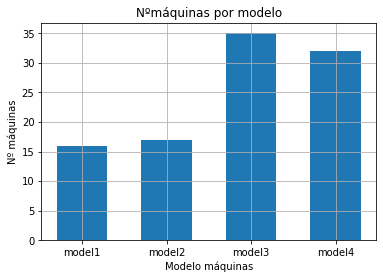

In [7]:
#Nº MAQ/MODEL
#Gráfico de barras    
plt.bar(count_model_s.index, count_model_s.values, width = 0.6)
plt.title('Nºmáquinas por modelo')
plt.xlabel("Modelo máquinas")
plt.ylabel("Nº máquinas")
plt.grid()

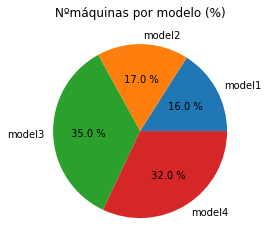

In [8]:
#Gráfico de pastel/circular
plt.pie(count_model_s.values, labels=count_model_s.index, autopct="%0.1f %%")
plt.title('Nºmáquinas por modelo (%)')
plt.show()

##### Nº MÁQUINAS/EDAD

In [9]:
count_age_s = count_age.sort_index() 
count_age_s 

0      1
1      3
2      6
3      4
4      3
5      4
6      4
7      6
8      1
9      5
10    10
11     2
12     2
14    14
15     6
16     5
17     7
18     6
19     4
20     7
Name: age, dtype: int64

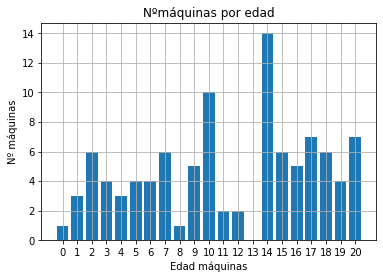

In [10]:
#Nº MAQ/AGE
#Gráfico de barras    
# plt.bar(count_age_s.index, count_age_s.values, width = 0.6)
plt.bar(count_age_s.index, count_age_s.values)
plt.xticks(np.arange(21))
plt.title('Nºmáquinas por edad')
plt.xlabel("Edad máquinas")
plt.ylabel("Nº máquinas")
plt.grid()

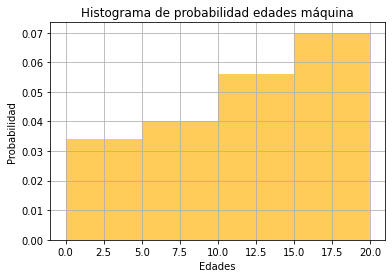

In [11]:
edades = df_machines['age']
colores=['#ff9757', '#ffcb59', '#d6ee39', '#6ade30']
n, bins, patches=plt.hist(edades, bins=4, density=True, color=colores[1])
plt.xlabel("Edades")
plt.ylabel("Probabilidad")
plt.title("Histograma de probabilidad edades máquina")
plt.grid()
plt.show()

### 1.2 SUBCONJUNTO: HISTORIAL DE MANTENIMIENTO

In [12]:
#Visualizar muestra del subconjunto de datos
display(df_maint)

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4
...,...,...,...
3281,2015-10-10 06:00:00,100,comp3
3282,2015-10-25 06:00:00,100,comp4
3283,2015-11-09 06:00:00,100,comp4
3284,2015-12-09 06:00:00,100,comp2


##### NºREGISTROS/COMP

In [13]:
#Contador de "comp"
count_comp = df_maint['comp'].value_counts()
count_comp_s = count_comp.sort_index() 
count_comp_s

comp1    804
comp2    863
comp3    808
comp4    811
Name: comp, dtype: int64

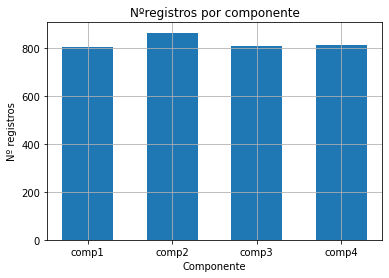

In [14]:
#NºREGISTROS/COMP
#Gráfico de barras    
plt.bar(count_comp_s.index, count_comp_s.values, width = 0.6)
plt.title('Nºregistros por componente')
plt.xlabel("Componente")
plt.ylabel("Nº registros")
plt.grid()

In [15]:
#Nº máximo de componentes reemplazados
print('Nº máx. comp.:',count_comp_s.max())
print('Nº mín. comp.:', count_comp_s.min())

Nº máx. comp.: 863
Nº mín. comp.: 804


##### NºREGISTROS/MÁQUINA

In [16]:
count_maint = df_maint['machineID'].value_counts()
count_maint_s = count_maint.sort_index() 
count_maint_s

1      37
2      32
3      37
4      33
5      35
       ..
96     33
97     34
98     37
99     34
100    28
Name: machineID, Length: 100, dtype: int64

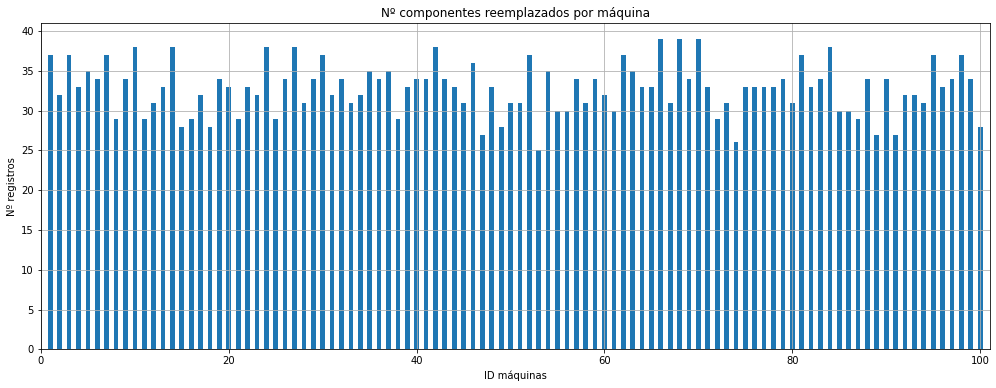

In [17]:
plt.figure(figsize=(17,6))
plt.bar(count_maint_s.index, count_maint_s.values, width = 0.5)
plt.xlim(0,101)
plt.ylim(0,41)
plt.title('Nº componentes reemplazados por máquina')
plt.xlabel("ID máquinas")
plt.ylabel("Nº registros")
plt.grid()

In [18]:
#Nº máximo de componentes reemplazados
print('Nº máx. comp.:',count_maint_s.max())
print('Nº mín. comp.:', count_maint_s.min())

Nº máx. comp.: 39
Nº mín. comp.: 25


##### NºREGISTROS/COMP/MÁQUINA

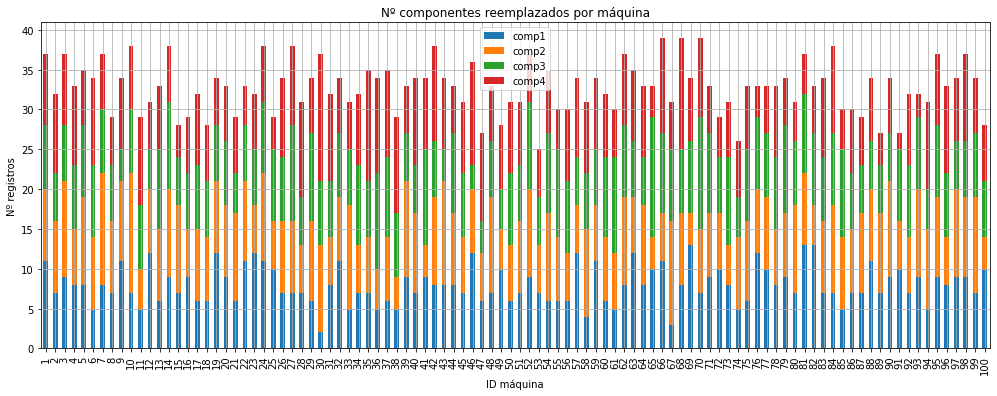

In [19]:
#Nºregistros/comp/máquina
df_comp_ID = df_maint.groupby(["machineID", "comp"]).size().reset_index()
df_comp_ID.columns = ["machineID", "comp", "num_comp"]
df_comp_ID_pivot = pd.pivot(df_comp_ID, index="machineID", columns="comp", values="num_comp").rename_axis(None, axis=1)

df_comp_ID_pivot.plot.bar(stacked=True, figsize=(17, 6), title="Nº componentes reemplazados por máquina")
plt.xlabel("ID máquina")
plt.ylabel("Nº registros");
plt.grid()

##### NºREGISTROS/DÍA

In [20]:
# Primero se deja solo la fecha:
df_dates_maint = pd.DataFrame()
df_dates_maint['fecha'] = df_maint['datetime'].apply(lambda x: x.split(' ')[0])
df_dates_maint['fecha'] = pd.to_datetime(df_dates_maint['fecha'])
df_dates_maint

,fecha
0,2014-06-01
1,2014-07-16
2,2014-07-31
3,2014-12-13
4,2015-01-05
...,...
3281,2015-10-10
3282,2015-10-25
3283,2015-11-09
3284,2015-12-09


In [21]:
#Nº registros para cada fecha
count_dates_maint2 = df_dates_maint['fecha'].value_counts().sort_index()
count_dates_maint2

2014-06-01    32
2014-06-16    31
2014-07-01    27
2014-07-16    31
2014-07-31    20
              ..
2015-12-28    14
2015-12-29     7
2015-12-30    11
2015-12-31    15
2016-01-01     7
Name: fecha, Length: 374, dtype: int64

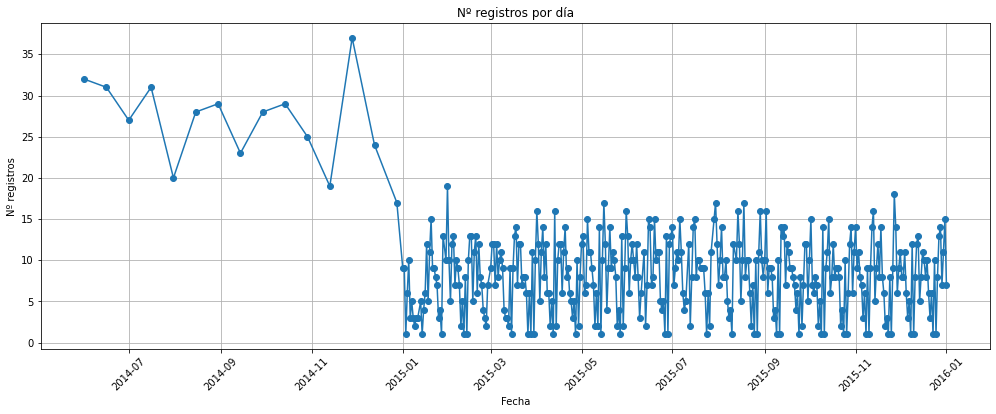

In [22]:
plt.figure(figsize=(17,6))
plt.plot_date(count_dates_maint2.index, count_dates_maint2.values, linestyle ='solid')
plt.title('Nº registros por día')
plt.xlabel("Fecha")
plt.ylabel("Nº registros")
plt.xticks(rotation=45)
plt.grid()

In [23]:
#Primera y última fecha
print('Primera fecha:', count_dates_maint2.index[0])
print('Última fecha:', count_dates_maint2.index[-1])

Primera fecha: 2014-06-01 00:00:00
Última fecha: 2016-01-01 00:00:00


### 1.3 SUBCONJUNTO: HISTORIAL DE FALLOS

In [24]:
#Visualizar muestra del subconjunto de datos
display(df_failures)

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4
...,...,...,...
756,2015-11-29 06:00:00,99,comp3
757,2015-12-14 06:00:00,99,comp4
758,2015-02-12 06:00:00,100,comp1
759,2015-09-10 06:00:00,100,comp1


##### Nº REGISTROS/COMP

In [25]:
#Contador de "failures"
count_failure = df_failures['failure'].value_counts()
count_failure_s = count_failure.sort_index() 
count_failure_s

comp1    192
comp2    259
comp3    131
comp4    179
Name: failure, dtype: int64

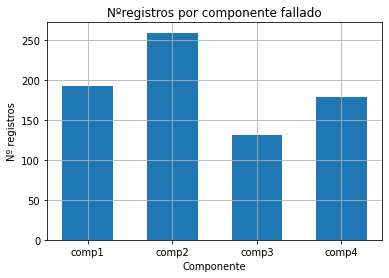

In [26]:
#NºREGISTROS/FAILURES
#Gráfico de barras    
plt.bar(count_failure_s.index, count_failure_s.values, width = 0.6)
plt.title('Nºregistros por componente fallado')
plt.xlabel("Componente")
plt.ylabel("Nº registros")
plt.grid()

In [27]:
#Nº máximo y mínimo de componentes fallados
print('Nº máx. comp.:',count_failure_s.max())
print('Nº mín. comp.:', count_failure_s.min())

Nº máx. comp.: 259
Nº mín. comp.: 131


##### NºREGISTROS/MÁQUINA

In [28]:
count_failuresMachine = df_failures['machineID'].value_counts()
count_failuresMachine_s = count_failuresMachine.sort_index() 
count_failuresMachine_s

1       7
2       4
3       5
4       6
5       7
       ..
96      5
97      8
98     16
99     19
100     3
Name: machineID, Length: 98, dtype: int64

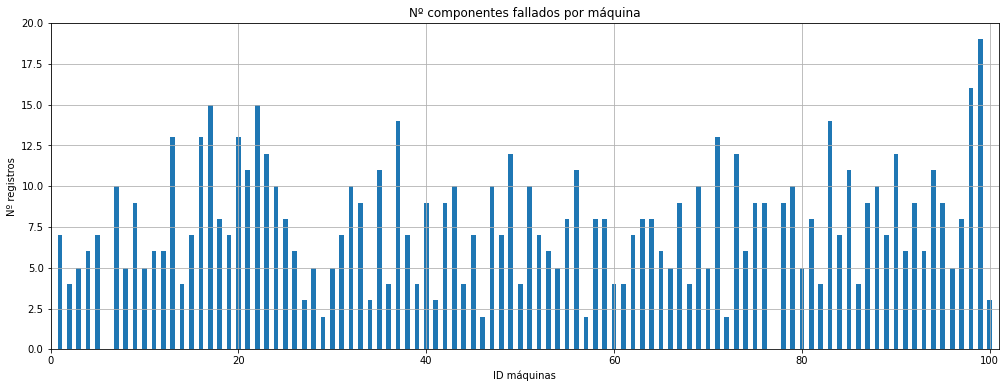

In [29]:
plt.figure(figsize=(17,6))
plt.bar(count_failuresMachine_s.index, count_failuresMachine_s.values, width = 0.5)
plt.xlim(0,101)
plt.ylim(0,20)
plt.title('Nº componentes fallados por máquina')
plt.xlabel("ID máquinas")
plt.ylabel("Nº registros")
plt.grid()

In [30]:
#Nº máximo de componentes fallados
print('Nº máx. comp.:',count_failuresMachine_s.max())
print('Nº mín. comp.:', count_failuresMachine_s.min())

Nº máx. comp.: 19
Nº mín. comp.: 2


##### NºREGISTROS/COMP/MÁQUINA

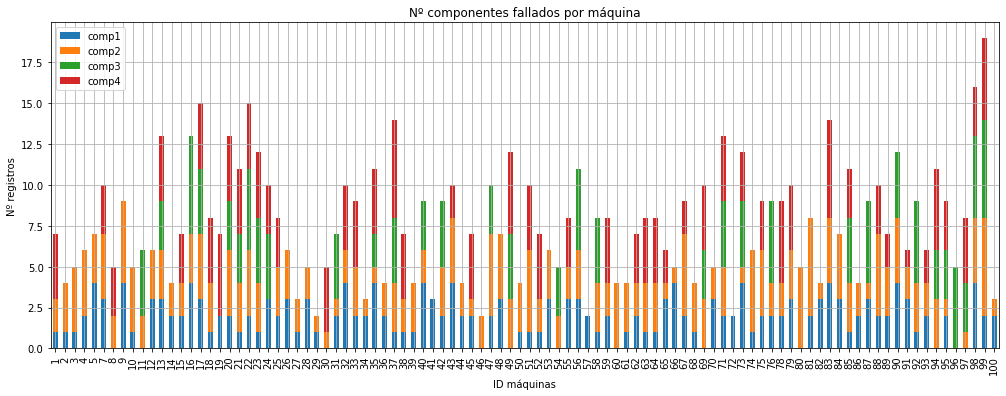

In [31]:
#Nºregistros/comp/máquina
df_failures_ID = df_failures.groupby(["machineID", "failure"]).size().reset_index()
df_failures_ID.columns = ["machineID", "failure", "num_failure"]
df_failures_ID_pivot = pd.pivot(df_failures_ID, index="machineID", columns="failure", values="num_failure").rename_axis(None, axis=1)

df_failures_ID_pivot.plot.bar(stacked=True, figsize=(17, 6), title="Nº componentes fallados por máquina")
plt.xlabel("ID máquinas")
plt.ylabel("Nº registros");
plt.grid()

##### NºREGISTROS/DÍA

In [32]:
# Primero se deja solo la fecha:
df_dates_failures = pd.DataFrame()
df_dates_failures['fecha'] = df_failures['datetime'].apply(lambda x: x.split(' ')[0])
df_dates_failures['fecha'] = pd.to_datetime(df_dates_failures['fecha'])
df_dates_failures

,fecha
0,2015-01-05
1,2015-03-06
2,2015-04-20
3,2015-06-19
4,2015-09-02
...,...
756,2015-11-29
757,2015-12-14
758,2015-02-12
759,2015-09-10


In [33]:
#Nº registros para cada fecha
count_dates_failures2 = df_dates_failures['fecha'].value_counts().sort_index()
count_dates_failures2

2015-01-02    21
2015-01-04     3
2015-01-05     5
2015-01-06     1
2015-01-07     4
              ..
2015-12-26     3
2015-12-27     5
2015-12-29     2
2015-12-30     3
2015-12-31     4
Name: fecha, Length: 301, dtype: int64

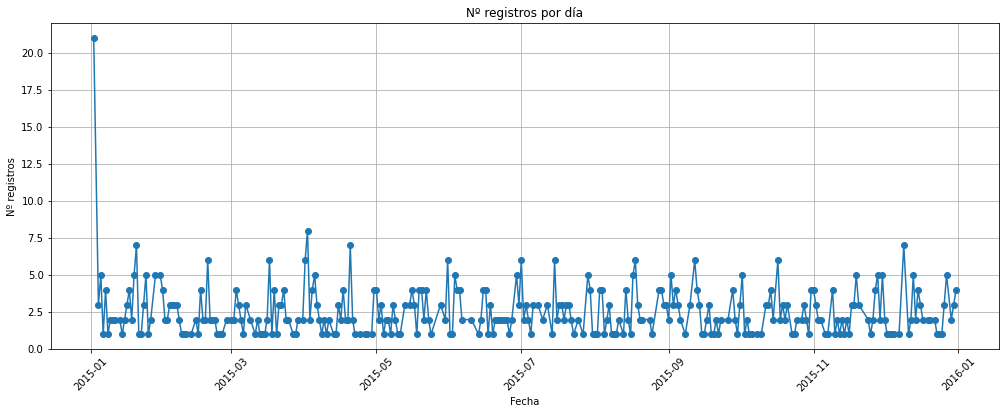

In [34]:
plt.figure(figsize=(17,6))
plt.plot_date(count_dates_failures2.index, count_dates_failures2.values, linestyle ='solid')
plt.title('Nº registros por día')
plt.xlabel("Fecha")
plt.ylabel("Nº registros")
plt.xticks(rotation=45)
plt.grid()

In [35]:
#Primera y última fecha
print('Primera fecha:', count_dates_failures2.index[0])
print('Última fecha:', count_dates_failures2.index[-1])

Primera fecha: 2015-01-02 00:00:00
Última fecha: 2015-12-31 00:00:00


### 1.4 SUBCONJUNTO: HISTORIAL DE ERRORES

In [36]:
#Visualizar muestra del subconjunto de datos
display(df_errors)

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4
...,...,...,...
3914,2015-11-21 08:00:00,100,error2
3915,2015-12-04 02:00:00,100,error1
3916,2015-12-08 06:00:00,100,error2
3917,2015-12-08 06:00:00,100,error3


##### Nº REGISTROS/COMP

In [37]:
#Contador de "errors"
count_errors = df_errors['errorID'].value_counts()
count_errors_s = count_errors.sort_index() 
count_errors_s

error1    1010
error2     988
error3     838
error4     727
error5     356
Name: errorID, dtype: int64

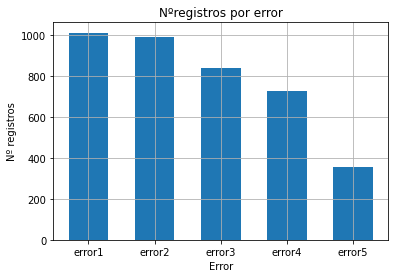

In [38]:
#NºREGISTROS/ERROR
#Gráfico de barras    
plt.bar(count_errors_s.index, count_errors_s.values, width = 0.6)
plt.title('Nºregistros por error')
plt.xlabel("Error")
plt.ylabel("Nº registros")
plt.grid()

In [39]:
#Nº máximo de errores
print('Nº máx. comp.:',count_errors_s.max())
print('Nº mín. comp.:', count_errors_s.min())

Nº máx. comp.: 1010
Nº mín. comp.: 356


##### NºREGISTROS/MÁQUINA

In [40]:
count_errorsMachine = df_errors['machineID'].value_counts()
count_errorsMachine_s = count_errorsMachine.sort_index() 
count_errorsMachine_s

1      35
2      28
3      39
4      31
5      38
       ..
96     39
97     45
98     45
99     54
100    31
Name: machineID, Length: 100, dtype: int64

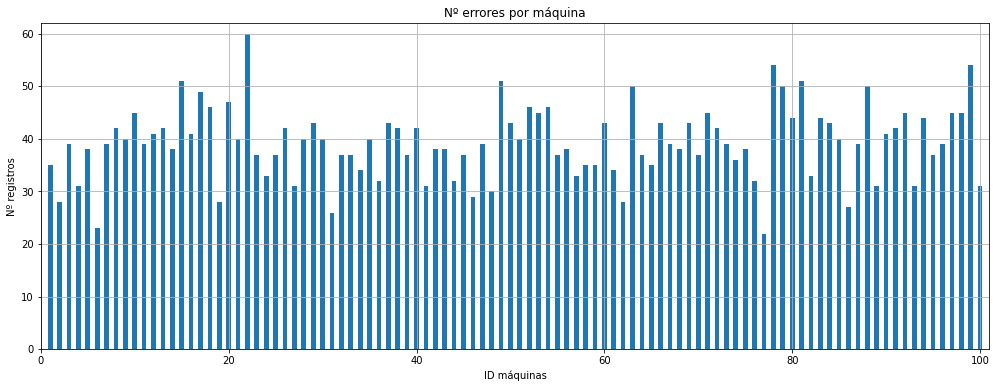

In [41]:
plt.figure(figsize=(17,6))
plt.bar(count_errorsMachine_s.index, count_errorsMachine_s.values, width = 0.5)
plt.xlim(0,101)
plt.ylim(0,62)
plt.title('Nº errores por máquina')
plt.xlabel("ID máquinas")
plt.ylabel("Nº registros")
plt.grid(visible=True)

In [42]:
#Nº máximo de componentes reemplazados
print('Nº máx. errors:', count_errorsMachine_s.max())
print('Nº mín. errors:', count_errorsMachine_s.min())

Nº máx. errors: 60
Nº mín. errors: 22


##### NºREGISTROS/COMP/MÁQUINA

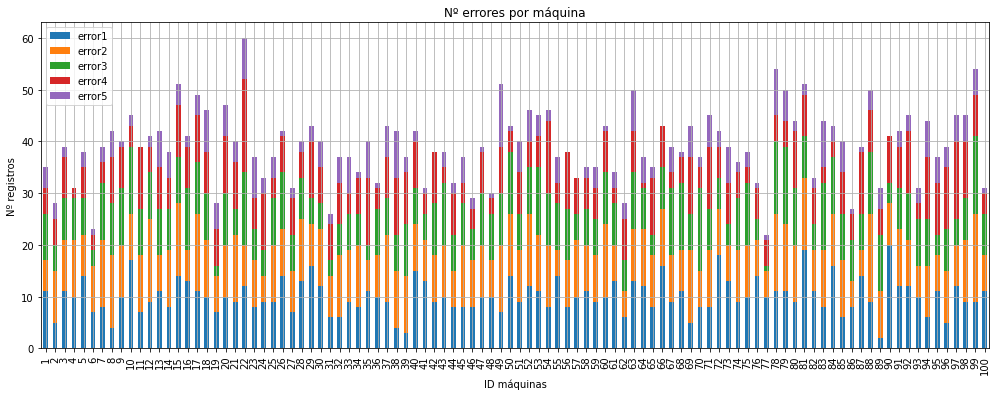

In [43]:
#Nºregistros/comp/máquina
df_errors_ID = df_errors.groupby(["machineID", "errorID"]).size().reset_index()
df_errors_ID.columns = ["machineID", "error", "num_error"]
df_errors_ID_pivot = pd.pivot(df_errors_ID, index="machineID", columns="error", values="num_error").rename_axis(None, axis=1)

df_errors_ID_pivot.plot.bar(stacked=True, figsize=(17, 6), title="Nº errores por máquina")
plt.xlabel("ID máquinas")
plt.ylabel("Nº registros");
plt.grid()

##### NºREGISTROS/DÍA

In [44]:
# Primero se deja solo la fecha:
df_dates_errors = pd.DataFrame()
df_dates_errors['fecha'] = df_errors['datetime'].apply(lambda x: x.split(' ')[0])
df_dates_errors['fecha'] = pd.to_datetime(df_dates_errors['fecha'])
df_dates_errors

,fecha
0,2015-01-03
1,2015-01-03
2,2015-01-04
3,2015-01-10
4,2015-01-22
...,...
3914,2015-11-21
3915,2015-12-04
3916,2015-12-08
3917,2015-12-08


In [45]:
#Nº registros para cada fecha
df_dates_errors2 = df_dates_errors['fecha'].value_counts().sort_index()
df_dates_errors2

2015-01-01    12
2015-01-02     9
2015-01-03    14
2015-01-04    15
2015-01-05    12
              ..
2015-12-28     9
2015-12-29     8
2015-12-30    13
2015-12-31     4
2016-01-01     2
Name: fecha, Length: 366, dtype: int64

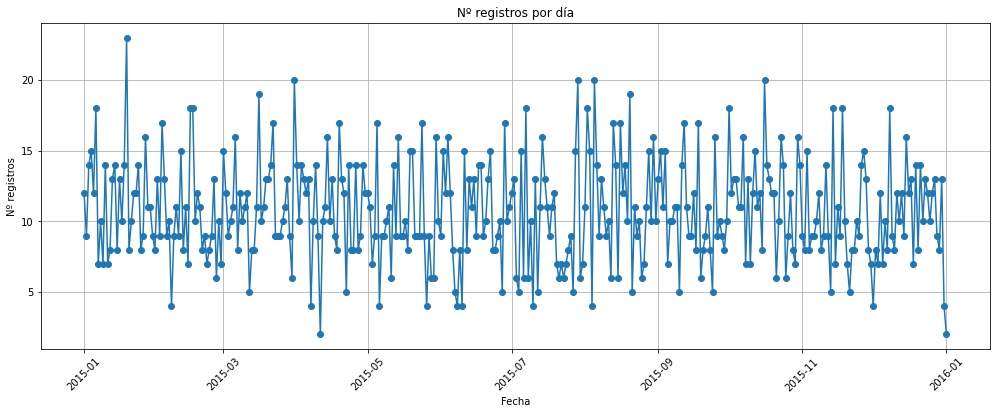

In [46]:
plt.figure(figsize=(17,6))
plt.plot_date(df_dates_errors2.index, df_dates_errors2.values, linestyle ='solid')
plt.title('Nº registros por día')
plt.xlabel("Fecha")
plt.ylabel("Nº registros")
plt.xticks(rotation=45)
plt.grid()

In [47]:
#Primera y última fecha
print('Primera fecha:', df_dates_errors2.index[0])
print('Última fecha:', df_dates_errors2.index[-1])

Primera fecha: 2015-01-01 00:00:00
Última fecha: 2016-01-01 00:00:00


### 1.5 SUBCONJUNTO: CARACTERÍSTICAS DE LAS MÁQUINAS

In [48]:
#Visualizar muestra del subconjunto de datos
display(df_telemetry)

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941
876096,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072
876097,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561
876098,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259


##### Nº REGISTROS/MÁQUINA

In [49]:
count_machineTelemetry = df_telemetry['machineID'].value_counts()
count_machineTelemetry_s = count_machineTelemetry.sort_index() 
count_machineTelemetry_s

1      8761
2      8761
3      8761
4      8761
5      8761
       ... 
96     8761
97     8761
98     8761
99     8761
100    8761
Name: machineID, Length: 100, dtype: int64

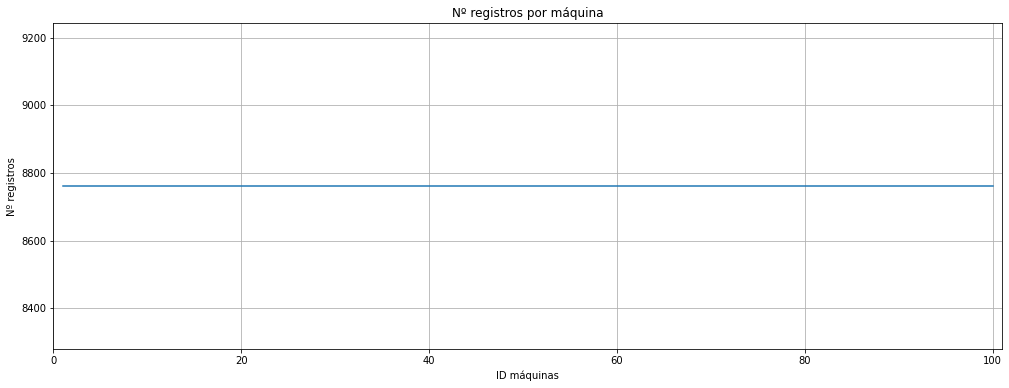

In [50]:
plt.figure(figsize=(17,6))
plt.plot(count_machineTelemetry_s.index, count_machineTelemetry_s.values) #width = 0.5
plt.xlim(0,101)
# plt.ylim(0,62)
plt.title('Nº registros por máquina')
plt.xlabel("ID máquinas")
plt.ylabel("Nº registros")
plt.grid()

Todas las máquinas poseen el mismo número de registros

In [51]:
#Nº máximo y mínimo de registros
print('Nº máx. errors:', count_machineTelemetry_s.max())
print('Nº mín. errors:', count_machineTelemetry_s.min())

Nº máx. errors: 8761
Nº mín. errors: 8761


##### NºREGISTROS/DIA

In [52]:
# Primero se deja solo la fecha:
df_dates_telemetry = pd.DataFrame()
df_dates_telemetry['fecha'] = df_telemetry['datetime'].apply(lambda x: x.split(' ')[0])
df_dates_telemetry['fecha'] = pd.to_datetime(df_dates_telemetry['fecha'])
df_dates_telemetry

,fecha
0,2015-01-01
1,2015-01-01
2,2015-01-01
3,2015-01-01
4,2015-01-01
...,...
876095,2016-01-01
876096,2016-01-01
876097,2016-01-01
876098,2016-01-01


In [53]:
#Nº registros para cada fecha
count_dates_telemetry = df_dates_telemetry['fecha'].value_counts().sort_index()
count_dates_telemetry

2015-01-01    1800
2015-01-02    2400
2015-01-03    2400
2015-01-04    2400
2015-01-05    2400
              ... 
2015-12-28    2400
2015-12-29    2400
2015-12-30    2400
2015-12-31    2400
2016-01-01     700
Name: fecha, Length: 366, dtype: int64

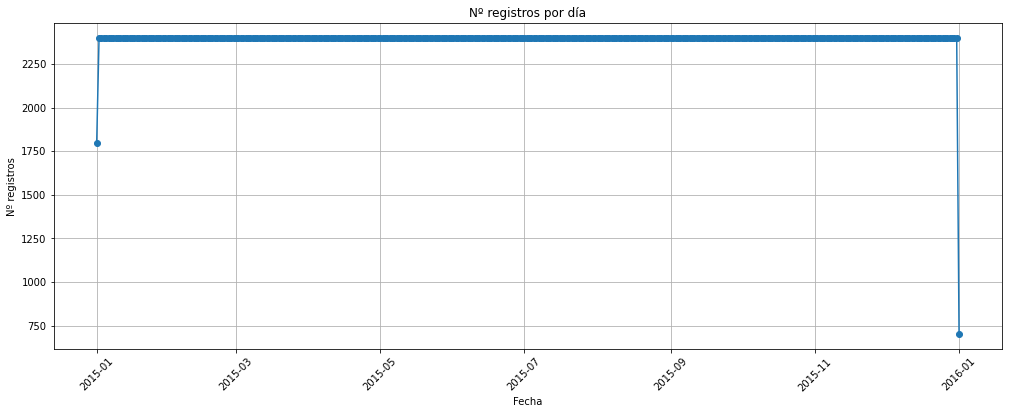

In [54]:
plt.figure(figsize=(17,6))
plt.plot_date(count_dates_telemetry.index, count_dates_telemetry.values, linestyle ='solid')
plt.title('Nº registros por día')
plt.xlabel("Fecha")
plt.ylabel("Nº registros")
plt.xticks(rotation=45)
plt.grid()

In [55]:
#Primera y última fecha
print('Primera fecha:', count_dates_telemetry.index[0])
print('Última fecha:', count_dates_telemetry.index[-1])

Primera fecha: 2015-01-01 00:00:00
Última fecha: 2016-01-01 00:00:00


##### VALORES/MÁQUINA 1

In [56]:
#Máscara máquina 1
df_mask_m1=df_telemetry['machineID']==1

#Dataframe
df_telemetry_m1 = pd.DataFrame()

#Aplicar máscara, filtered_df = df[df_mask]
df_telemetry_m1 = df_telemetry[df_mask_m1]

#to_datetime
df_telemetry_m1['datetime'] = pd.to_datetime(df_telemetry_m1['datetime'])

#Ver resultado para máquina 1
display(df_telemetry_m1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...,...
8756,2016-01-01 02:00:00,1,153.724780,450.254337,85.197443,43.698137
8757,2016-01-01 03:00:00,1,172.418099,375.701907,95.568265,42.111661
8758,2016-01-01 04:00:00,1,174.588145,460.505353,95.483913,33.293572
8759,2016-01-01 05:00:00,1,184.224228,438.823315,102.694358,46.609515


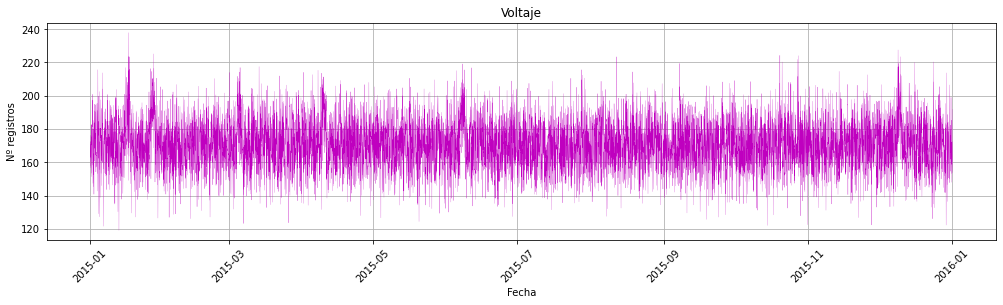

In [57]:
#VOLTAJE
plt.figure(figsize=(17,4))
plt.plot_date(df_telemetry_m1['datetime'],df_telemetry_m1['volt'], 'm', linewidth=0.2)
plt.title('Voltaje')
plt.xlabel("Fecha")
plt.ylabel("Nº registros")
plt.xticks(rotation=45)
plt.grid()
plt.show()

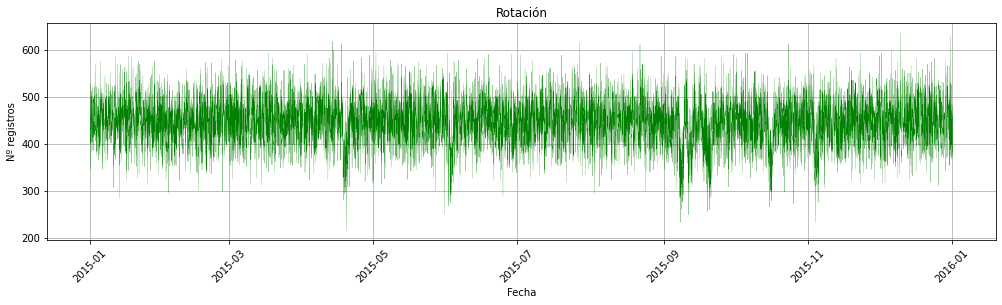

In [58]:
#ROTACIÓN
plt.figure(figsize=(17,4))
plt.plot_date(df_telemetry_m1['datetime'],df_telemetry_m1['rotate'], 'g', linewidth=0.2)
plt.title('Rotación')
plt.xlabel("Fecha")
plt.ylabel("Nº registros")
plt.xticks(rotation=45)
plt.grid()

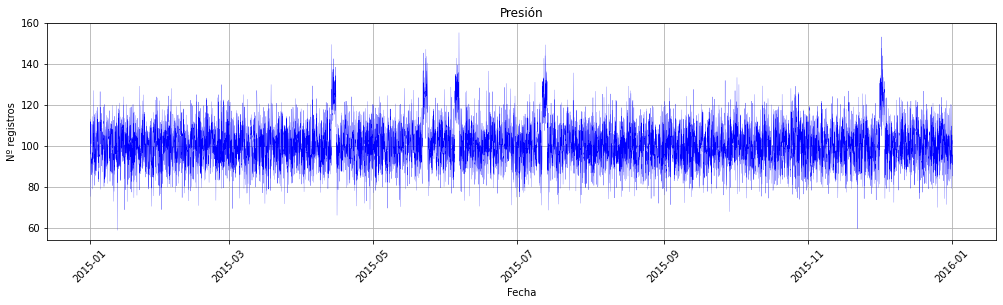

In [59]:
#PRESIÓN
plt.figure(figsize=(17,4))
plt.plot_date(df_telemetry_m1['datetime'],df_telemetry_m1['pressure'], 'b', linewidth=0.2)
plt.title('Presión')
plt.xlabel("Fecha")
plt.ylabel("Nº registros")
plt.xticks(rotation=45)
plt.grid()

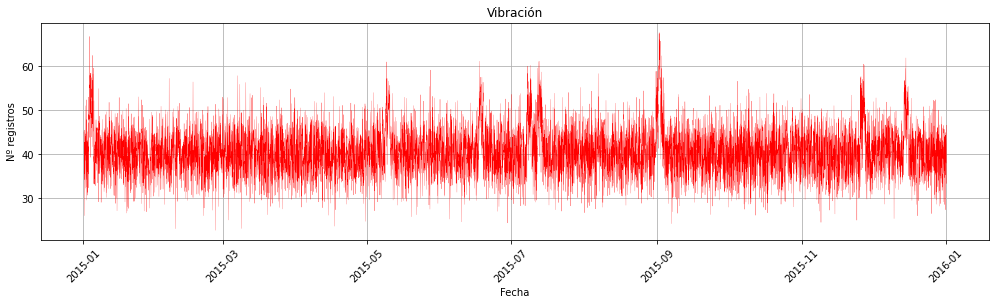

In [60]:
#VIBRACIÓN
plt.figure(figsize=(17,4))
plt.plot_date(df_telemetry_m1['datetime'],df_telemetry_m1['vibration'], 'r', linewidth=0.2)
plt.title('Vibración')
plt.xlabel("Fecha")
plt.ylabel("Nº registros")
plt.xticks(rotation=45)
plt.grid()

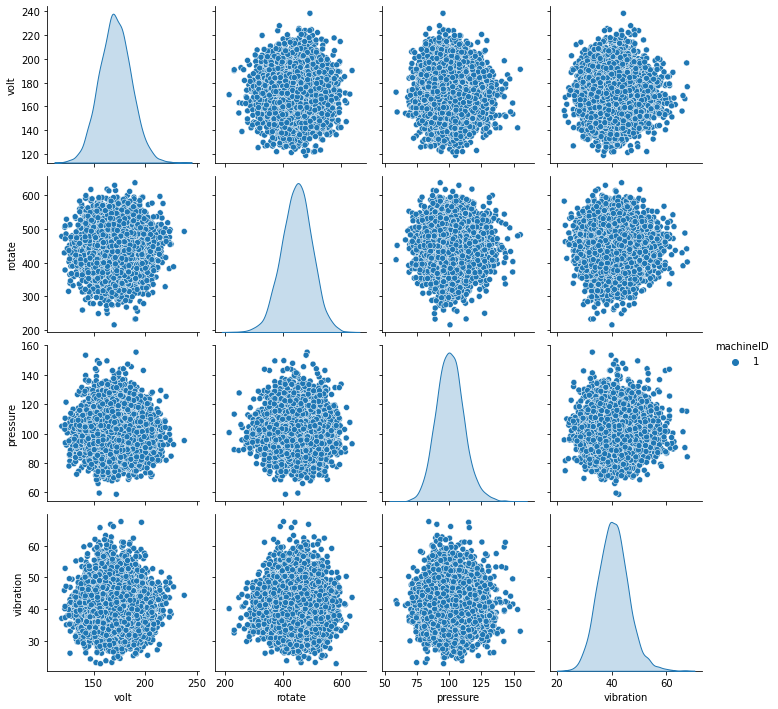

In [61]:
# Relación de cada pareja en seaborn, máquina 1
sns.pairplot(df_telemetry_m1.drop(columns=['datetime'],axis=1), hue = "machineID") #separar las especies
plt.show()